In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
important link :  
https://colab.research.google.com/drive/1r4SKtNbKRDVD3gmy_DpqfcgMbW9ALDID?usp=sharing #refer this colab  file
https://github.com/c17hawke/Exploring_deep_learning/tree/master/edge%20detection%20basics
https://github.com/c17hawke/ANN-implementation-DLCVNLP-demo
    
    '''https://github.dev/c17hawke/ANN-implementation-DLCVNLP-demo/blob/main/src/training.py
    here --> https://github.com replace with github.dev it will open th vs code in browser itself
    https://github.com/c17hawke/ANN-implementation-DLCVNLP-demo/blob/main/src/training.py'''
    

SyntaxError: invalid syntax (3986132956.py, line 1)

In [5]:
tf.__version__

'2.7.0'

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
!nvidia-smi

Sat Jan 15 10:16:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
mnist = tf.keras.datasets.mnist

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [12]:
X_train_full.shape # 60,000 data points of 28*28 size images

(60000, 28, 28)

In [13]:
y_train_full.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [16]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
img.shape

(28, 28)

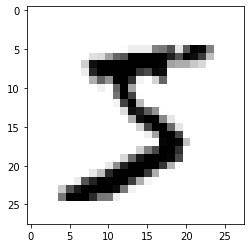

In [18]:
plt.imshow(img, cmap="binary")

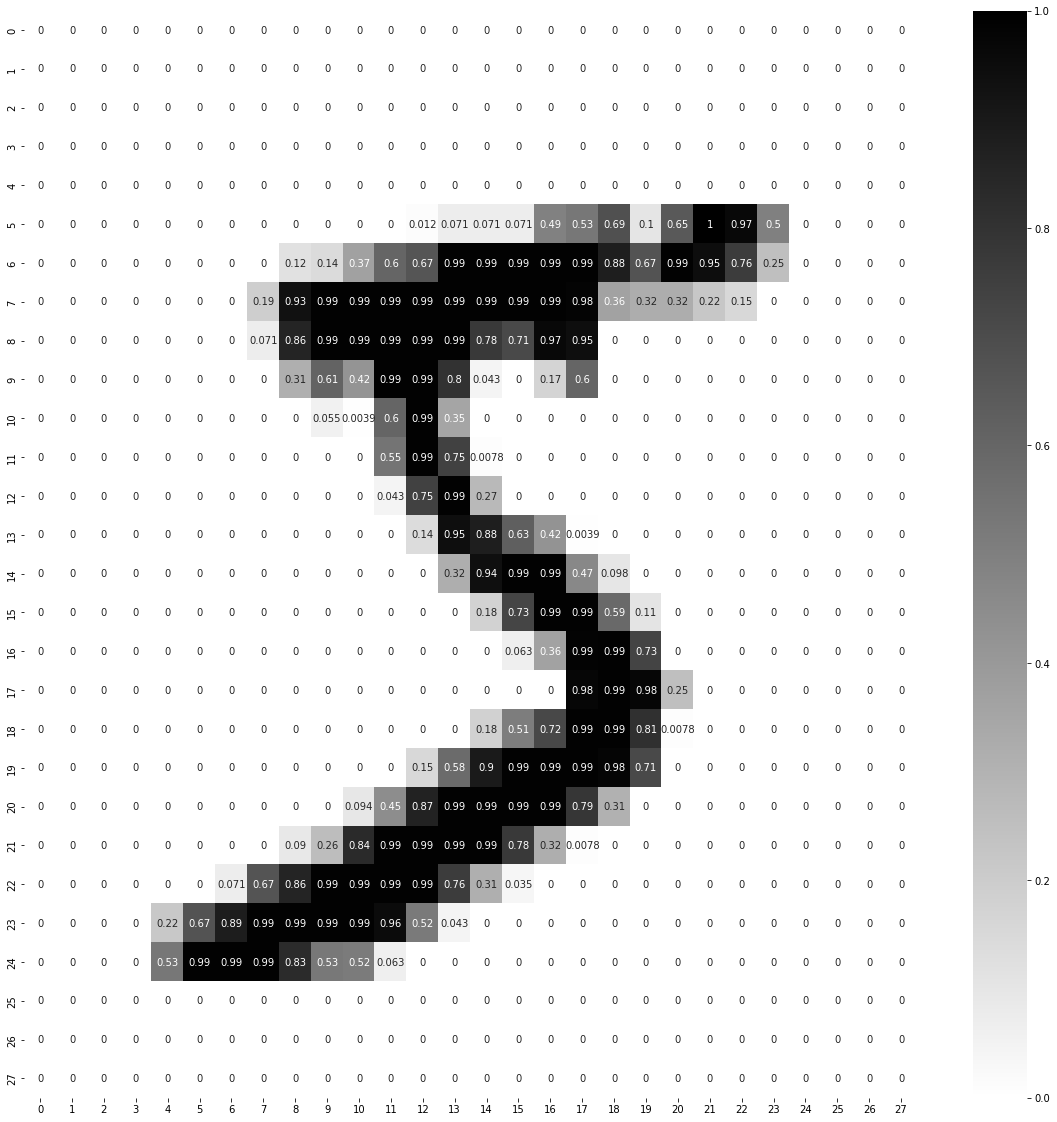

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [23]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



X_test = X_test / 255

In [25]:
CLASSES = 10

LAYERS = [
          tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"),
]

In [27]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [28]:
model_clf.layers

In [29]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
784*300 + 300

235500

In [31]:
300*100 + 100

30100

In [32]:
100*10 + 10

1010

In [34]:
sum([235500, 30100, 1010])

266610

In [37]:
model_clf.layers[1].name

'hiddenLayer1'

In [39]:
weights, biases = model_clf.layers[1].get_weights()

In [40]:
weights.shape

(784, 300)

In [60]:
weights[0].dtype

dtype('float32')

In [41]:
biases.shape

(300,)

In [61]:
biases.dtype

dtype('float32')

In [42]:
weights

array([[-0.00710101, -0.01053655,  0.0163215 , ...,  0.06267482,
        -0.0481339 , -0.04749293],
       [ 0.06926428,  0.05502941,  0.06487799, ..., -0.02178466,
         0.03429456, -0.00019407],
       [-0.05917618,  0.01403632, -0.03050875, ...,  0.05898352,
        -0.01665251, -0.06127705],
       ...,
       [ 0.01920754, -0.00983853, -0.01935659, ..., -0.07343055,
        -0.03632317, -0.04312244],
       [ 0.02040131, -0.04125546,  0.01990788, ...,  0.04960439,
        -0.01469485,  0.0082219 ],
       [ 0.02235353, -0.05383185,  0.0669163 , ..., -0.00750262,
        -0.03720435, -0.05501631]], dtype=float32)

In [43]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [63]:
(266610 * 32)/8

1066440.0

In [44]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # consider, way to calculate loss, how much error u r getting, it is function
#which take actual and predicted value, our objective is to reduce the loss
OPTIMIZER = "SGD" #which will help u to find out the minima of loss functn
METRICS = ["accuracy"] #on what metrics we will understand that o/p is correct or not

model_clf.compile(loss=LOSS_FUNCTION, 
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [64]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, 
              epochs=EPOCHS, batch_size=16,
              validation_data=VALIDATION)

Epoch 1/30
1414/3438 [===========>..................] - ETA: 6s - loss: 0.0302 - accuracy: 0.9928

KeyboardInterrupt: ignored

In [47]:
type(history.history)

dict

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.618111,0.841691,0.307905,0.9146
1,0.291124,0.916345,0.245537,0.9294
2,0.238799,0.931927,0.202675,0.9406
3,0.203639,0.942255,0.177059,0.9496
4,0.177429,0.949036,0.160318,0.9546
5,0.157192,0.954291,0.145594,0.9610
6,0.140105,0.959564,0.128588,0.9650
7,0.127035,0.963909,0.119477,0.9672
8,0.115334,0.967491,0.112000,0.9678
9,0.105688,0.970018,0.106144,0.9696


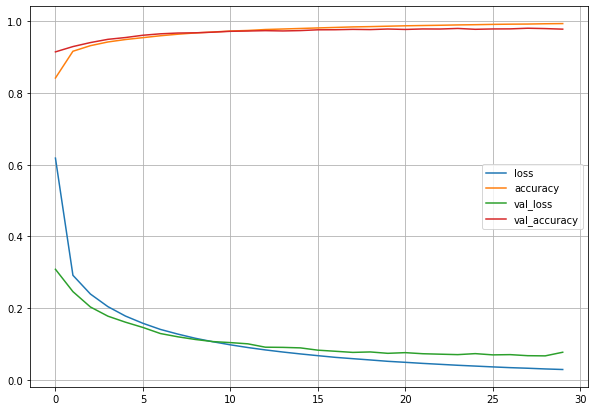

In [50]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [65]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9769


[0.07357887923717499, 0.9768999814987183]

In [55]:
X_test.shape[0] / 32

312.5

In [56]:
model_clf.save("test.h5")

In [67]:
X_new = X_test[:3]


y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

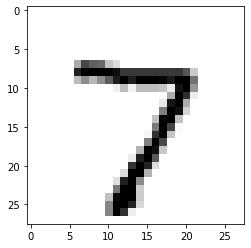

In [68]:
plt.imshow(X_new[0], cmap="binary")

In [71]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

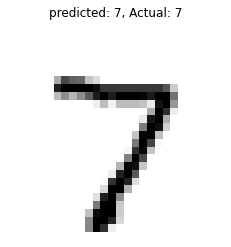

------------------------------------------------------------


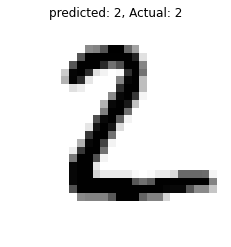

------------------------------------------------------------


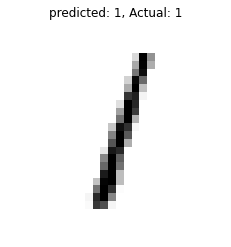

------------------------------------------------------------


In [73]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)